# TRACE Demo

The code below is intended to demonstrate the essential features of TRACE, compare it with its MATLAB predecessor TRACEv1, and establish guidelines for use and interpretation of its output. The code and output here are preliminary and subject to breaking changes.

## Overview

TRACE is organized as a Python application rather than a published package, and should be downloaded or cloned from its Github repository at [github.com/d-sandborn/pyTRACE](https://github.com/d-sandborn/pyTRACE) and installed locally as per the directions on that page. 

If you have questions, comments, or suggestion, please reach out to Daniel Sandborn at sandborn (at) uw.edu and Brendan Carter at brendan.carter (at) gmail.com. 

## Check Values

The first demonstration mirrors that on the TRACEv1 repo.

In [13]:
from pyTRACE import trace
import numpy as np

 
output = trace(output_coordinates=np.array([[0, 0, 0], [0, 0, 0]]),
               dates=np.array([2000, 2200]),
               predictor_measurements=np.array([[35, 20], [35, 20]]),
               predictor_types=np.array([1, 2]),
               atm_co2_trajectory=9,
               verbose_tf = False #to remove loading bars from the notebook
              )

output

<xarray.Dataset> Size: 208B
Dimensions:       (loc: 2)
Coordinates:
    year          (loc) int64 16B 2000 2200
    lon           (loc) int64 16B 0 0
    lat           (loc) int64 16B 0 0
Dimensions without coordinates: loc
Data variables:
    dic           (loc) float64 16B 2.011e+03 2.04e+03
    dic_ref       (loc) float64 16B 1.962e+03 1.962e+03
    canth         (loc) float64 16B 49.31 77.96
    age           (loc) float64 16B 4.316 4.316
    preformed_ta  (loc) float64 16B 2.296e+03 2.296e+03
    preformed_si  (loc) float64 16B 2.167 2.167
    preformed_p   (loc) float64 16B 0.5108 0.5108
    temperature   (loc) float64 16B 20.0 20.0
    salinity      (loc) float64 16B 35.0 35.0
    uncertainty   (loc) float64 16B 8.835 12.65
Attributes:
    description:  pyTRACE output

## Speed Test

In [12]:
import pandas as pd
input_df = pd.DataFrame(
    {
        "lat": np.ones((10000)),
        "lon": np.linspace(-80, 80, 10000),
        "depth": np.random.normal(loc=1000, size=(10000)),
        "year": np.ones((10000)) * 2020,
        "sal": np.random.normal(loc=35, size=(10000)),
        "temp": np.random.normal(loc=15, size=(10000)),
    }
)

%timeit trace(output_coordinates=input_df[["lat", "lon", "depth"]].to_numpy(), dates=input_df.year.to_numpy(), predictor_measurements=input_df[["sal", "temp"]].to_numpy(),predictor_types=np.array([1, 2]),atm_co2_trajectory=5,verbose_tf = False)

33.6 s ± 810 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Regional Scale

In [53]:
gridx, gridy = np.meshgrid(np.linspace(20, -100, 100), np.linspace(0,90, 100))

input_df = pd.DataFrame(
    {
        "lat": gridx.ravel(),
        "lon": gridy.ravel(),
        "depth": np.ones(len(gridx.ravel()))*1500,
        "year": np.ones(len(gridx.ravel())) * 2020,
        "sal": np.ones(len(gridx.ravel()))*35,
        "temp": np.ones(len(gridx.ravel())) * 5,
    }
)

output = trace(output_coordinates=input_df[["lat", "lon", "depth"]].to_numpy(), 
               dates=input_df.year.to_numpy(), 
               predictor_measurements=input_df[["sal", "temp"]].to_numpy(),
               predictor_types=np.array([1, 2]),
               atm_co2_trajectory=5,
               verbose_tf = False)

output

/home/des/Insync/dsandborntahoe@gmail.com/Google Drive/Python_stuff/PyTRACE/pyTRACE/pyTRACE/neuralnets/__init__.py:427: RuntimeWarning: overflow encountered in exp
  return 2 / (1 + np.exp(-2 * n)) - 1


<xarray.Dataset> Size: 1MB
Dimensions:       (loc: 10000)
Coordinates:
    year          (loc) float64 80kB 2.02e+03 2.02e+03 ... 2.02e+03 2.02e+03
    lon           (loc) float64 80kB 20.0 18.79 17.58 ... 262.4 261.2 260.0
    lat           (loc) float64 80kB 0.0 0.0 0.0 0.0 0.0 ... 90.0 90.0 90.0 90.0
Dimensions without coordinates: loc
Data variables:
    dic           (loc) float64 80kB 2.114e+03 2.114e+03 ... 2.117e+03 2.117e+03
    dic_ref       (loc) float64 80kB 2.097e+03 2.096e+03 ... 2.092e+03 2.093e+03
    canth         (loc) float64 80kB 17.56 17.74 17.88 18.0 ... 24.86 24.87 24.9
    age           (loc) float64 80kB 177.3 174.9 173.0 ... 104.7 104.7 104.5
    preformed_ta  (loc) float64 80kB 2.306e+03 2.306e+03 ... 2.302e+03 2.302e+03
    preformed_si  (loc) float64 80kB 6.595 6.585 6.575 ... 6.754 6.752 6.739
    preformed_p   (loc) float64 80kB 0.9577 0.9587 0.9595 ... 0.8526 0.8519
    temperature   (loc) float64 80kB 5.0 5.0 5.0 5.0 5.0 ... 5.0 5.0 5.0 5.0 5.0
    salinity      (loc) float64 80kB 35.0 35.0 35.0 35.0 ... 35.0 35.0 35.0 35.0
    uncertainty   (loc) float64 80kB 5.504 5.517 5.528 ... 6.105 6.105 6.109
Attributes:
    description:  pyTRACE output

Text(0, 0.5, 'Latitude')

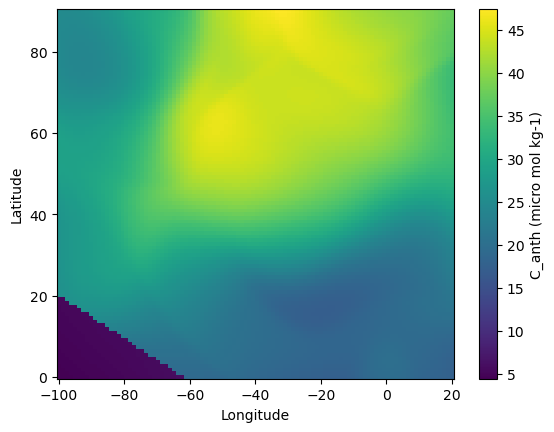

In [54]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
p = ax.pcolormesh(gridx, gridy, np.reshape(output.canth.data, gridx.shape))
fig.colorbar(p, label= 'C_anth (micro mol kg-1)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

In [42]:
np.linspace(0,-71)

array([  0.        ,  -1.44897959,  -2.89795918,  -4.34693878,
        -5.79591837,  -7.24489796,  -8.69387755, -10.14285714,
       -11.59183673, -13.04081633, -14.48979592, -15.93877551,
       -17.3877551 , -18.83673469, -20.28571429, -21.73469388,
       -23.18367347, -24.63265306, -26.08163265, -27.53061224,
       -28.97959184, -30.42857143, -31.87755102, -33.32653061,
       -34.7755102 , -36.2244898 , -37.67346939, -39.12244898,
       -40.57142857, -42.02040816, -43.46938776, -44.91836735,
       -46.36734694, -47.81632653, -49.26530612, -50.71428571,
       -52.16326531, -53.6122449 , -55.06122449, -56.51020408,
       -57.95918367, -59.40816327, -60.85714286, -62.30612245,
       -63.75510204, -65.20408163, -66.65306122, -68.10204082,
       -69.55102041, -71.        ])